In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
error = pd.read_csv('errors.csv')

In [3]:
error.head(5)

,SNo,Options,Error
0,1,['We came in early today because we had a meet...,No error found
1,2,['We came in early today so we had a meeting.'],Missing comma in compound sentence
2,3,['We came in early today but we had a meeting.'],Missing comma in compound sentence
3,4,"[""We came in early today that's why we had a m...",No error found
4,5,['Whose your favorite singer?'],Possibly confused word


In [4]:
error.fillna(' ', inplace = True)

In [5]:
error_1 = error[error['Error'] != 'No error found']

In [6]:
error_1.head()

,SNo,Options,Error
1,2,['We came in early today so we had a meeting.'],Missing comma in compound sentence
2,3,['We came in early today but we had a meeting.'],Missing comma in compound sentence
4,5,['Whose your favorite singer?'],Possibly confused word
6,7,['Who is yours favorite singer?'],Incorrect possessive form
10,11,['Who is got the Filmfare award?'],Passive voice


In [29]:
p = error[error['Error'] != 'No error found']

TypeError: string indices must be integers

In [7]:
errors = error['Error']

In [41]:
for error in errors:
    if type(error) != type('Ashu'):
        print(error)

nan
nan
nan
nan
nan


In [8]:
errors = np.array(errors)

In [12]:
errors = str(errors)

In [9]:
unique_errors, unique_error_counts = np.unique(errors, return_counts=True)

In [10]:
unique_error_counts

array([   2,    2,    2,   23,    2,    1,    1,    6,   17,    1,    1,
          4,    1,    1,    3,    8,    1,    1,    3,    1,   57,    7,
          8,    4,    6,    1,    2,    1,   54,   10,   24,    1,    3,
          8,    1,    3,    2,   30,    1,    1,   18,    5,    3,   18,
          3,    3,    3,    3,    2,    2,   17,    3,   25, 1424,    1,
         10,    2,    4,    1,    5,    1,    2,   31,    1,    1,    2,
          1,    6,    1,    2,    1,    2,    4,   10,    1,    2,    2,
         17,    2,    3,    1,    1,    1,   75,   13,    2,    1,    5,
          5,    1,    1,    1,   18,    7,    4,    3,    2,    8,    3,
          3,    4,    2,    2,    1,    4])

In [11]:
unique_errors

array(['Adverb instead of adjective', 'Capitalization',
       'Confused possessive and contraction', 'Confused preposition',
       'Confused pronoun', 'Confused which and who', 'Double negative',
       'Empty phrases', 'Incorrect article use',
       'Incorrect article use before proper name',
       'Incorrect compound superlative', 'Incorrect negative verb form',
       'Incorrect noun form',
       'Incorrect plural verb with collective noun',
       'Incorrect possessive form', 'Incorrect quantifier',
       'Incorrect quantifier with uncountable noun',
       'Incorrect spacing with punctuation',
       'Incorrect use of progressive tense', 'Incorrect verb',
       'Incorrect verb form', 'Incorrect verb form after do or does',
       'Incorrect verb form after modal',
       'Incorrect verb form in perfect tense',
       'Incorrect verb form of continuous tense',
       'Incorrect verb form with compound subject',
       'Incorrect verb form with conditional',
       'Incorrect

In [12]:
index = np.where(unique_errors == 'No error found')
unique_errors = np.delete(unique_errors, index)
unique_error_counts = np.delete(unique_error_counts, index)

In [13]:
import matplotlib.pyplot as plt

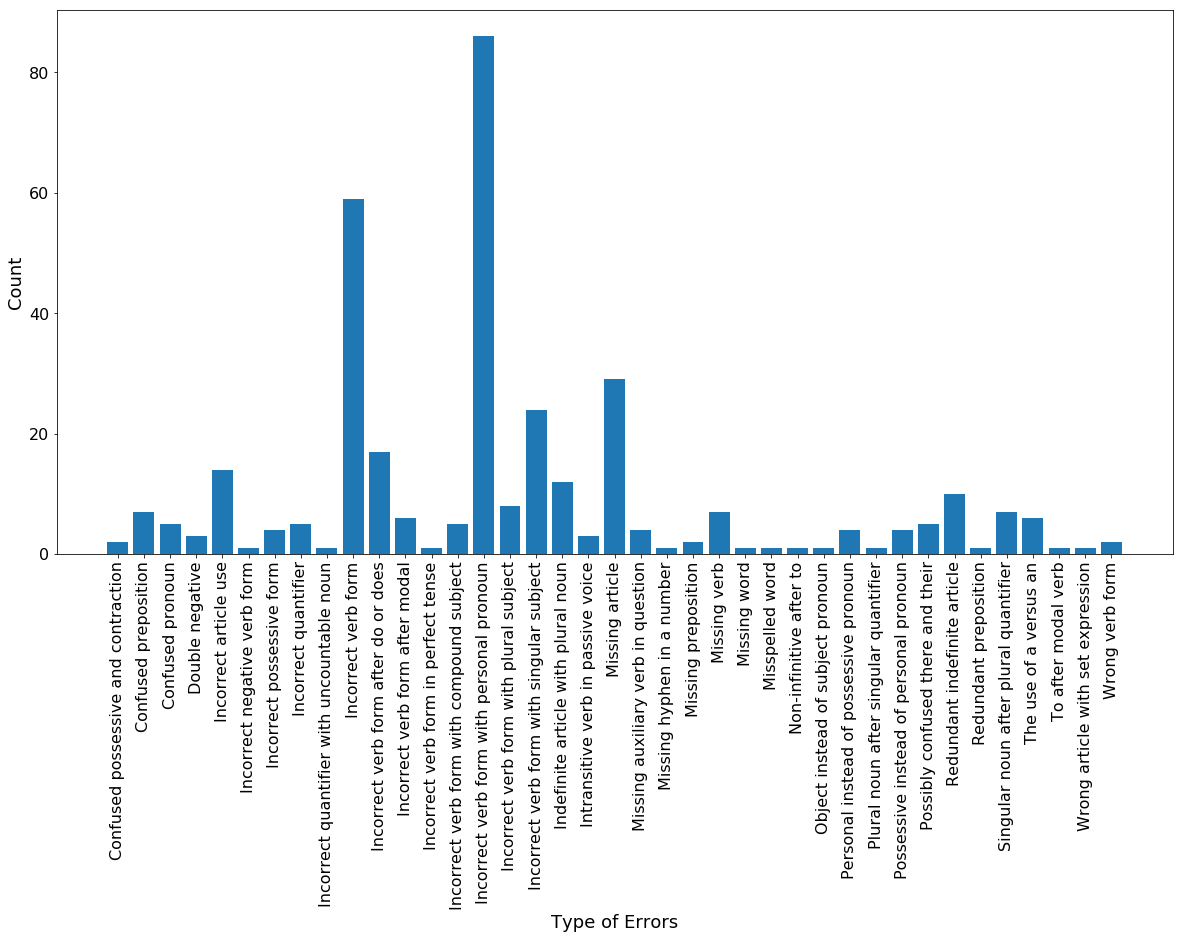

In [52]:
fig = plt.figure(figsize=(20,10))
plt.bar(unique_errors, unique_error_counts)
plt.xlabel('Type of Errors', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('errors_plot.png')

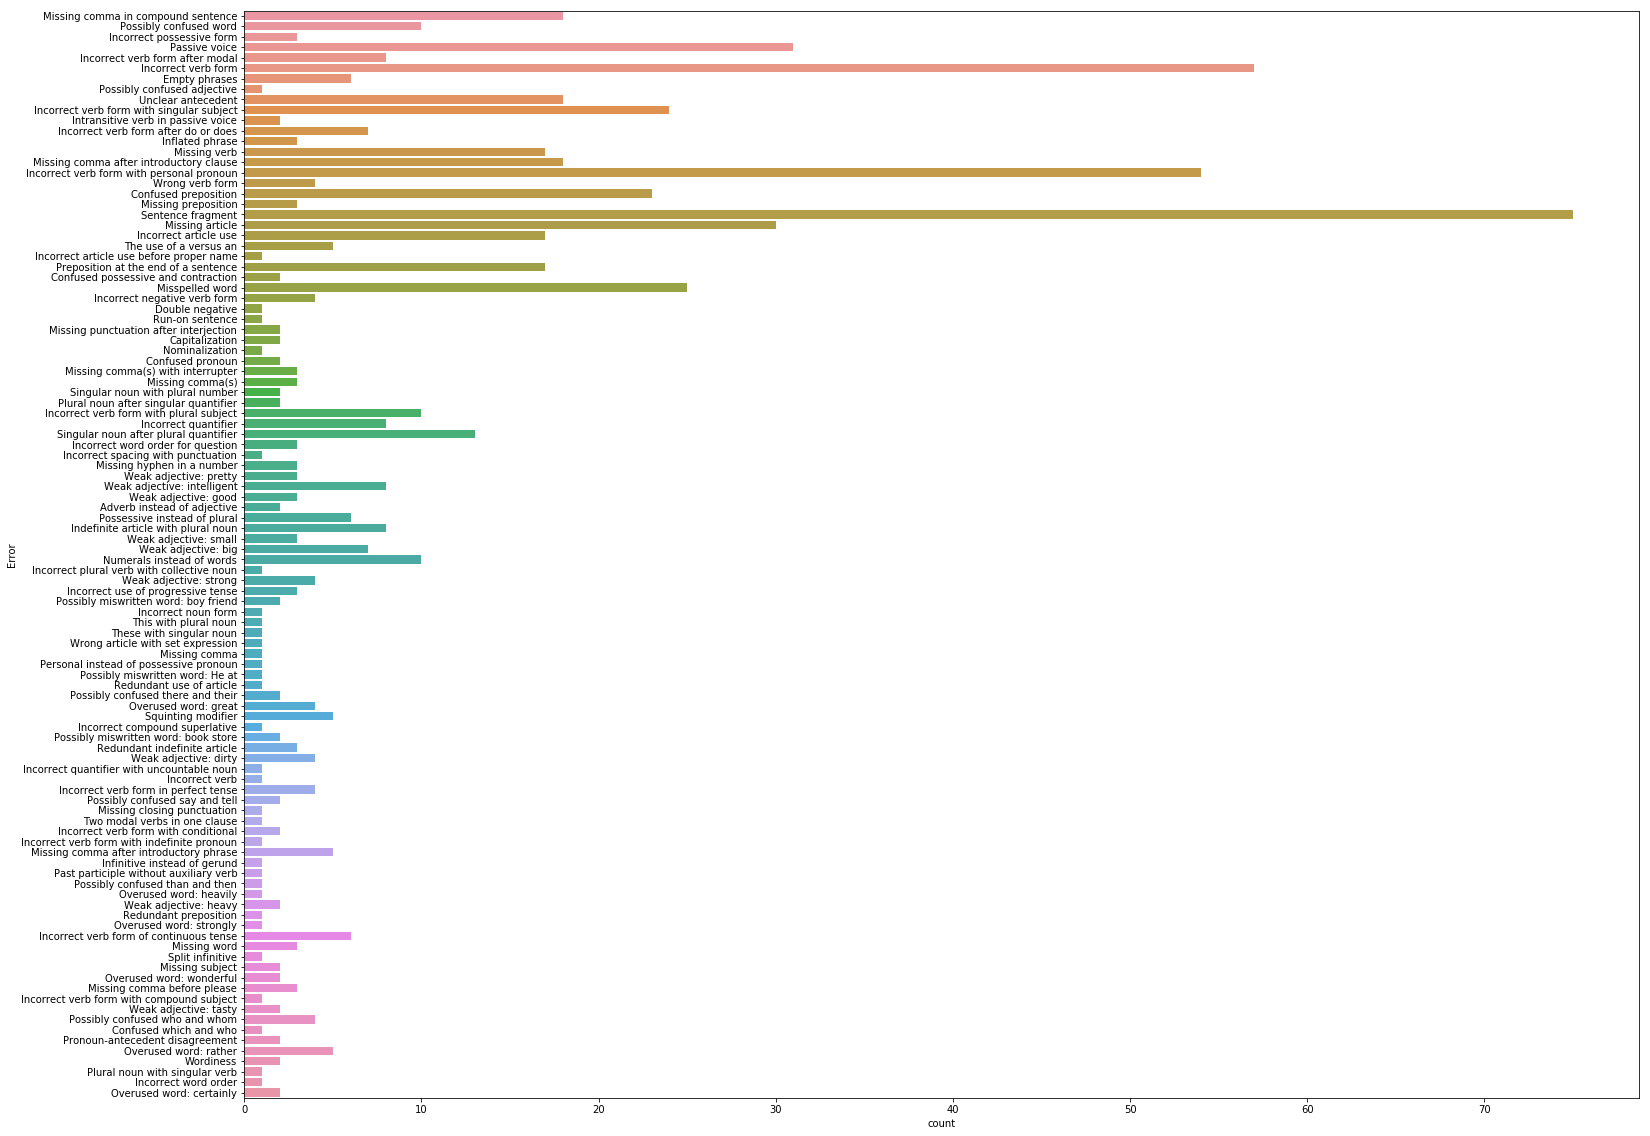

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,20))
sns.set(style="darkgrid")
sns_plot = sns.countplot(ax=ax, y="Error", data=error_1)
fig = sns_plot.get_figure()
fig.savefig('output.png') 

In [15]:
error.head()

,SNo,Options,Error
0,1,['We came in early today because we had a meet...,No error found
1,2,['We came in early today so we had a meeting.'],Missing comma in compound sentence
2,3,['We came in early today but we had a meeting.'],Missing comma in compound sentence
3,4,"[""We came in early today that's why we had a m...",No error found
4,5,['Whose your favorite singer?'],Possibly confused word


In [16]:
error.drop(['SNo'], axis = 1, inplace= True)

In [17]:
error.tail()

,Options,Error
2112,['I go to work daily.'],No error found
2113,['Men are too often led astray by prejudice.'],No error found
2114,['Men are too often led astray by the prejudic...,No error found
2115,['Arroyo'],No error found
2116,['Archipelago'],No error found


In [18]:
def exp(text):
    return text[text.find("\[\"|\'")+1:text.find("'|\"]")][1:]

In [19]:
exp(error['Options'][956])

"'A green shoe'"

In [20]:
error['Options'] = error['Options'].apply(exp)

In [21]:
error.to_excel('error_rest_choose4choose2.xlsx')